<center>
<img src="https://raw.githubusercontent.com/tquangsdh20/data-mining/main/.github/logo.svg">
</center>

<center> 
<img src="https://hcmuteduvn-my.sharepoint.com/:u:/g/personal/tquang_sdh20_hcmut_edu_vn/ERWQ6kVvIYBIgirMlO8rVNIB6rHJVq7P7gH8GDVz9_THWA?download=1"></center>

### Group 5
- **Le Thai** - *2170083*
- **Tran Quang** - *2070426*
- **Le Thai Duy** - *2070406*
- **Le Nhu Chien** - *1970289*
- **Phan Van Trung** - *2170440*

## 1. Data Collection

### 1.1. Discription

<div align="justify">
Tất cả dữ liệu được thu thập từ <a href="https://hopamchuan.com">HopAmChuan</a> được lưu trữ trong một Kho Dữ Liệu (<i>Data Warehouse</i>) nhằm mục đích chính là phân tích dữ liệu trực tuyến dựa trên danh sách bài hát đã nghe của người dùng. Trong có dữ liệu gồm có nhiều bảng dữ liệu riêng lẻ được kết nối với nhau theo Mô Hình Quan Hệ (<i>Entity Relationship Diagram</i>) bên dưới. Mô hình quan hệ gồm có 5 bảng cơ bản:</div>

- **singer** : Bảng dữ liệu lưu thông tin các ca sĩ
- **song** : Bảng dữ liệu lưu thông tin các bài hát trong hệ thống
- **user** : Bảng dữ liệu lưu thông tin người dùng
- **playlist** : Bảng dữ liệu lưu thông tin các danh sách bài hát
- **rythm** : Bảng dữ liệu lưu thông tin bình chọn cho giai điệu của bài hát

Từ 5 bảng cơ bản trên Kho Dữ Liệu sẽ tự động tiến hành phân tích dữ liệu đa chiều để dự đoán các bài hát mà người dùng có thể yêu thích liệt kê lại thành một bảng mới là **RecomandList**.

### Entity Relationship Diagram (ERD)

<center>
<img src="https://raw.githubusercontent.com/tquangsdh20/data-mining/c5da9bee3778f6634c53d5cb10ca9599e229df05/.github/ERD.svg" height="600" width="600">
</center>

<div align="justify">Sau khi tiến thành tổng hợp và trích xuất dữ liệu từ kho ta thu được Bảng Dữ Liệu Tổng Hợp (<i>Pivot Table</i>) về một người dùng cụ thể từ các bảng dữ liệu trên như sau</div>

### Pivot Table

<table class="dataframe">
<caption>Bảng dữ liệu được tổng hợp từ nhiều thành phần riêng lẻ trong kho dữ liệu để đem đi phân tích</caption>
<thead>
	<tr><th>SongID</th><th scope=col>bollero</th><th scope=col>ballad</th><th scope=col>blue</th><th scope=col>bossanova</th><th scope=col>rock</th><th scope=col>chachacha</th><th scope=col>fox</th><th scope=col>rhumba</th><th scope=col>boston</th><th scope=col>disco</th><th scope=col>pop</th><th scope=col>slow</th><th scope=col>slowrock</th><th scope=col>tango</th><th scope=col>valse</th></tr>
</thead>
<tbody>
	<tr><th scope=row>1911</th><td>24</td><td>10</td><td>2</td><td>2</td><td>2</td><td>1</td><td>1</td><td>1</td><td>0</td><td>0</td><td>0</td><td> 0</td><td> 0</td><td>0</td><td> 0</td></tr>
	<tr><th scope=row>7073</th><td> 1</td><td> 5</td><td>0</td><td>0</td><td>0</td><td>0</td><td>0</td><td>0</td><td>0</td><td>0</td><td>0</td><td> 0</td><td> 4</td><td>0</td><td> 0</td></tr>
	<tr><th scope=row>769</th><td> 2</td><td>32</td><td>2</td><td>0</td><td>5</td><td>0</td><td>0</td><td>0</td><td>1</td><td>1</td><td>0</td><td> 9</td><td>57</td><td>0</td><td> 0</td></tr>
	<tr><th scope=row>4618</th><td> 1</td><td>25</td><td>8</td><td>1</td><td>3</td><td>2</td><td>2</td><td>3</td><td>0</td><td>0</td><td>4</td><td>74</td><td>11</td><td>6</td><td>14</td></tr>
	<tr><th scope=row>9460</th><td>39</td><td>10</td><td>1</td><td>0</td><td>0</td><td>3</td><td>0</td><td>1</td><td>3</td><td>1</td><td>0</td><td> 2</td><td>10</td><td>0</td><td> 0</td></tr>
	<tr><th scope=row>3368</th><td>73</td><td>23</td><td>3</td><td>0</td><td>0</td><td>2</td><td>1</td><td>4</td><td>3</td><td>7</td><td>1</td><td>13</td><td> 2</td><td>1</td><td> 0</td></tr>
</tbody>
</table>

<div align="justify">Trong đó, tập dữ liệu được tổng hợp ở trên có khoảng 26 bài hát yêu thích của một người dùng được đem đi phân tích. Mỗi một bài hát trên đều đã được công khai cho cộng đồng đánh giá âm hưởng giai điệu của bài hát thuộc giai điệu nào. Các giai điệu của bài hát được chia thành 15 giai điệu chính phổ biến nhất theo các dòng nhạc trên thế giới (<i>ballad, blue, pop, tango...</i>).</div>

In [17]:
require(FactoMineR)
file = 'https://hcmuteduvn-my.sharepoint.com/:t:/g/personal/tquang_sdh20_hcmut_edu_vn/EammePVOfsFGmUFLgxms85sBSGcCGzZVHMQ5k-YMKAmiiQ?download=1'
raw_dat = read.csv(file,header=T,row.names=1)

### Phân Tích Tương Quan (CA)

Warning message:
"ggrepel: 30 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


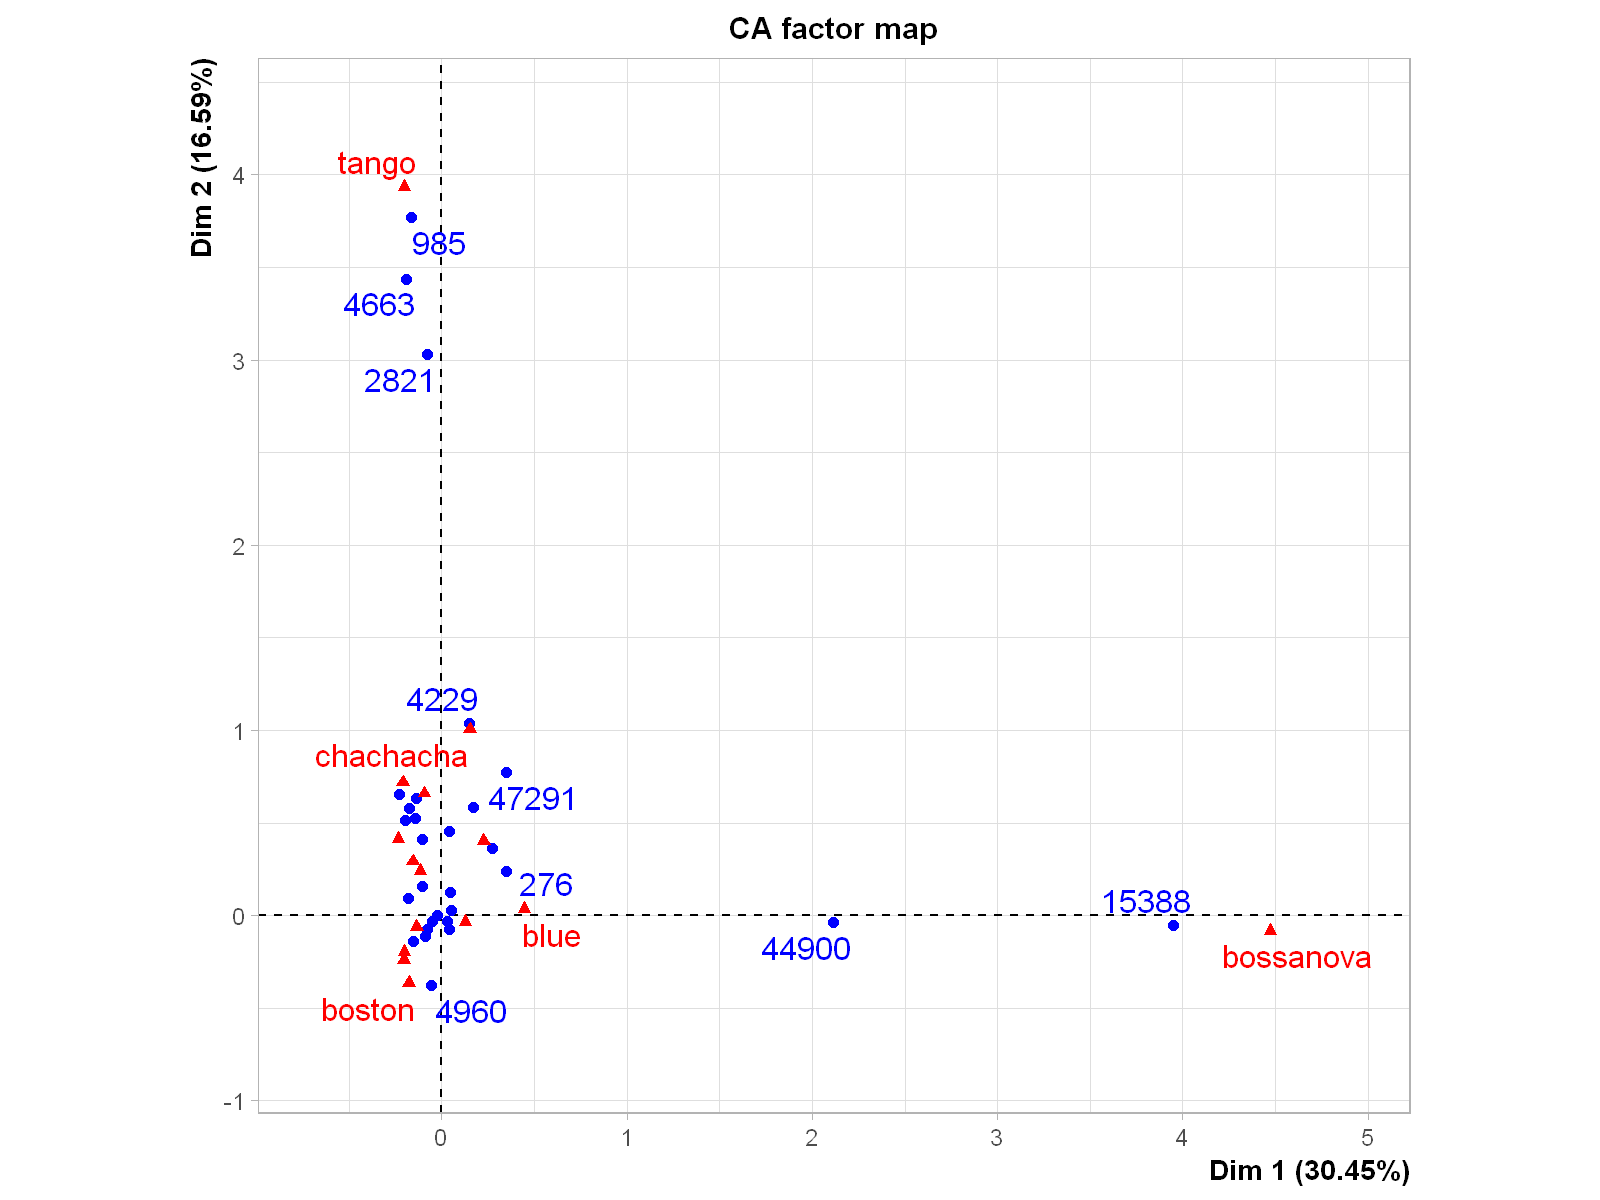

In [20]:
#This line is used for JupyterNotebook Only to Zoom In the Graph 
options(repr.plot.width = 8, repr.plot.height = 6, repr.plot.res = 200)

#R-Code-Lines:
res.dat<-CA(raw_dat)

In [22]:
#R-Code
res.dat$eig

,eigenvalue,percentage of variance,cumulative percentage of variance
dim 1,0.453697387,30.44636918,30.44637
dim 2,0.247274811,16.59392452,47.04029
dim 3,0.187669985,12.59401053,59.63430
dim 4,0.158610077,10.64388095,70.27819
dim 5,0.122736173,8.23648308,78.51467
dim 6,0.108670349,7.29256475,85.80723
dim 7,0.089371351,5.99746266,91.80470
dim 8,0.051871905,3.48097923,95.28567
dim 9,0.026302808,1.76510828,97.05078
dim 10,0.018895676,1.26803626,98.31882
